In [15]:
%matplotlib inline
from numpy.random import *
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import math
import pickle
import time
import datetime

In [63]:
df_market_spread=pd.read_csv("./View of Market Spread.csv")
df_market_spread.Date=pd.to_datetime(df_market_spread.Date)
df_market_spread.index = df_market_spread.Date
df_market_spread.head()

,bitFlyer,Quoine,BtcBox,Zaif,coincheck,Spread pair,Max spread,Date
Date,,,,,,,,
2016-12-15 01:56:00,90474,90663.00000,90454.0,90445,90799,coincheck - Zaif,354.0,2016-12-15 01:56:00
2016-12-15 02:01:00,90508,90659.84543,90542.0,90500,90849,coincheck - Zaif,349.0,2016-12-15 02:01:00
2016-12-15 02:06:00,90637,90799.58457,90657.0,90620,90950,coincheck - Zaif,330.0,2016-12-15 02:06:00
2016-12-15 02:11:00,90620,90771.10274,90877.0,90650,90943,coincheck - bitFlyer,323.0,2016-12-15 02:11:00
2016-12-15 02:16:00,90626,90808.00000,90793.0,90630,90894,coincheck - bitFlyer,268.0,2016-12-15 02:16:00


In [11]:
df_market_spread["spread_coincheck_quoine"] = df_market_spread["coincheck"] - df_market_spread["Quoine"] 
df_market_spread["spread_coincheck_quoine"] = df_market_spread["coincheck"] - df_market_spread["Quoine"] 

In [82]:
import itertools
exchange_pairs = list(itertools.permutations(["bitFlyer","Quoine","Zaif","coincheck" ], 2))
exchange_pair_list = list(map(lambda pair: "spread_"+pair[0] + '_' + pair[1], exchange_pairs))
for name, pair in zip(exchange_pair_list,exchange_pairs):
    print(name, pair)
    df_market_spread[name] = df_market_spread[pair[0]] - df_market_spread[pair[1]] 

spread_bitFlyer_Quoine ('bitFlyer', 'Quoine')
spread_bitFlyer_Zaif ('bitFlyer', 'Zaif')
spread_bitFlyer_coincheck ('bitFlyer', 'coincheck')
spread_Quoine_bitFlyer ('Quoine', 'bitFlyer')
spread_Quoine_Zaif ('Quoine', 'Zaif')
spread_Quoine_coincheck ('Quoine', 'coincheck')
spread_Zaif_bitFlyer ('Zaif', 'bitFlyer')
spread_Zaif_Quoine ('Zaif', 'Quoine')
spread_Zaif_coincheck ('Zaif', 'coincheck')
spread_coincheck_bitFlyer ('coincheck', 'bitFlyer')
spread_coincheck_Quoine ('coincheck', 'Quoine')
spread_coincheck_Zaif ('coincheck', 'Zaif')


In [83]:
df_market_spread_2017=df_market_spread[(df_market_spread['Date']>"2017-01-01") & (df_market_spread['Date']<"2017-12-31")]

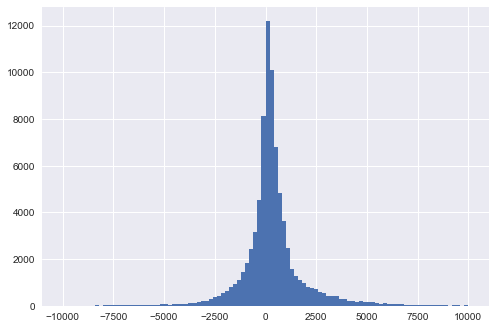

In [86]:
df_market_spread_2017["spread_coincheck_Quoine"].hist(bins=100, range=(-10000, 10000))

In [87]:
df_market_spread_2017.columns

Index(['bitFlyer', 'Quoine', 'BtcBox', 'Zaif', 'coincheck', 'Spread pair',
       'Max spread', 'Date', 'name', 'spread_bitFlyer_Quoine',
       'spread_bitFlyer_Zaif', 'spread_bitFlyer_coincheck',
       'spread_Quoine_bitFlyer', 'spread_Quoine_Zaif',
       'spread_Quoine_coincheck', 'spread_Zaif_bitFlyer', 'spread_Zaif_Quoine',
       'spread_Zaif_coincheck', 'spread_coincheck_bitFlyer',
       'spread_coincheck_Quoine', 'spread_coincheck_Zaif'],
      dtype='object')

In [88]:
df_market_spread_2017["month"]= df_market_spread_2017.apply(lambda x: x['Date'].month, axis=1)

/Users/take/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


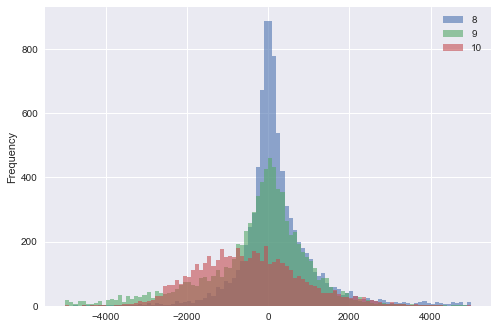

In [89]:
plt.figure()#初期化
target_month = range(8,11)
for month in target_month:
    ax = df_market_spread_2017[df_market_spread_2017['month'] == month]["spread_coincheck_Quoine"].plot.hist(bins=100, range=(-5000, 5000), alpha=0.6,legend=True)
ax.legend(target_month, loc='best')

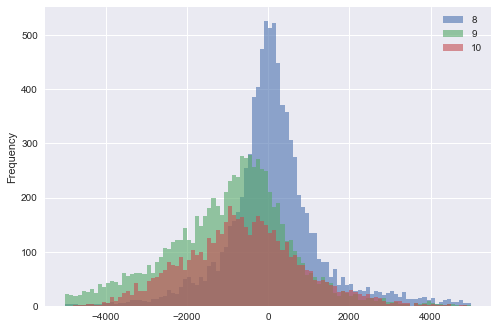

In [90]:
plt.figure()#初期化
target_month = range(8,11)
for month in target_month:
    ax = df_market_spread_2017[df_market_spread_2017['month'] == month]["spread_bitFlyer_Quoine"].plot.hist(bins=100, range=(-5000, 5000), alpha=0.6,legend=True)
ax.legend(target_month, loc='best')